# Homework 1

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

## Problem 1: Portfolio Optimization and Risk-Return Tradeoff Analysis using Modern Portfolio Theory

In Modern Portfolio Theory, one is interested in allocating a certain amount of money into a set of $N$ stocks. The portfolio $\mathbf{w}\in \mathbb{R}^N$ is the normalized money invested in each stock such that the sum of this $N$ dimensional vector is 1.

This allocation process is formulated as the following optimization problem:

$$  \begin{array}{ll} \underset{\mathbf{w}}{\mathsf{minimize}} & \mathbf{w}^\top\boldsymbol{\Sigma}\mathbf{w}\\ \mathsf{subject~to} & \boldsymbol{\mu}^\top\mathbf{w} \geq \beta \\ & \mathbf{w} \geq \mathbf{0} \\ & \mathbf{w}^\top\mathbf{1} = 1, \end{array}  $$
where $\boldsymbol{\mu}$ is the given vector of expected stock returns, and $\boldsymbol{\Sigma}$ is the given covariance matrix of the stock returns.

In the above formulation, the objective $\mathbf{w}^\top\boldsymbol{\Sigma}\mathbf{w}$ is portfolio variance, and the first component of the constraints $\mathbf{w}^\top\boldsymbol{\mu}$ is portfolio expected return, and $\beta$ is the parameter that controls the lower bound of expected return. Intuitively, our goal is to minimize the risk we take under the certain level of money we earn. The solution to the above problem, $\mathbf{w}^\star$, is often called the “Markowitz portfolio” or the “Mean-variance portfolio.”


### (a)

Argue whether this problem is convex or not.

### Answer:

$\mathbf{w}^\top\boldsymbol{\Sigma}\mathbf{w}$ is a quadratic function, where $\boldsymbol{\Sigma}$ is the covariance matrix and is always positive-semidefinite, so it is convex.

The constraints $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$, $\mathbf{w} \geq \mathbf{0}$ and $\mathbf{w}^\top\mathbf{1} = 1$ are affines, so both are convex.

Overall, this problem is convex with a convex objective function and convex constraints.

### (b)

Write a piece of code in Python and use CVXPY package to solve the above problem given the following values of $$\beta = \{0, 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05, 0.055, 0.06\},$$
with the following values of $\boldsymbol{\Sigma}$ and $\boldsymbol{\mu}$:
$$ \boldsymbol{\Sigma} = \begin{bmatrix} 1.0 & -0.003 & 0.02 \\ -0.003 & 1.0 & -0.15 \\ 0.02 & -0.15 & 1.0 \end{bmatrix} \\ \boldsymbol{\mu} = [0.02, 0.003, 0.07]^\top.$$
For each solution $\mathbf{w}^\star_{\beta}$, compute the following quantities
$$ \mathsf{Portfolio Expected Return}(\beta) = {\mathbf{w}^\star_{\beta}}^\top\boldsymbol{\mu} $$
$$ \mathsf{Portfolio Volatility}(\beta) = \sqrt{{\mathbf{w}^\star_{\beta}}^\top\boldsymbol{\Sigma}\mathbf{w}^\star_{\beta}} $$

Create a curve plot $\mathsf{Portfolio Expected Return}$ versus $\mathsf{Portfolio Volatility}$.

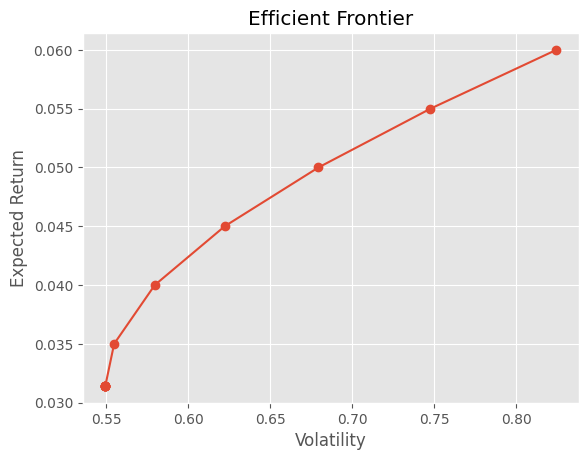

In [2]:
# Define data
beta_list = np.arange(0, 0.065, 0.005)
Sigma = np.array([[1.0, -0.003, 0.02], [-0.003, 1.0, -0.15], [0.02, -0.15, 1.0]])
mu = np.array([0.02, 0.003, 0.07])
w_list = []

# Solve for portolios
for beta in beta_list:
    w = cp.Variable(len(mu))
    objective = cp.Minimize(cp.quad_form(w, Sigma))
    constraints = [mu @ w >= beta, w >= 0, cp.sum(w) == 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    w_list.append(w.value)

# Calculate portolio expected return vesus portfolio volatility
expected_return = [w @ mu for w in w_list]
volatility = [np.sqrt(w @ Sigma @ w) for w in w_list]

# Plot portolio expected return vesus portfolio volatility
plt.plot(volatility, expected_return, "o-")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")
plt.show()

### (c)

If $\boldsymbol{\mu}^\top\mathbf{w}^\star_{\beta} = \beta$ , we say the inequality constraint $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$ is active at $\mathbf{w}^\star_{\beta}$. Otherwise, we say it is inactive.

Create a curve plot $\boldsymbol{\mu}^\top\mathbf{w}^\star_{\beta}$ versus $\beta$.

Find for which $\beta$ the inequality constraint $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$ is active.

Explain what will happen if $\beta \geq 0.07$.

Hint: Consider the constraint $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$.

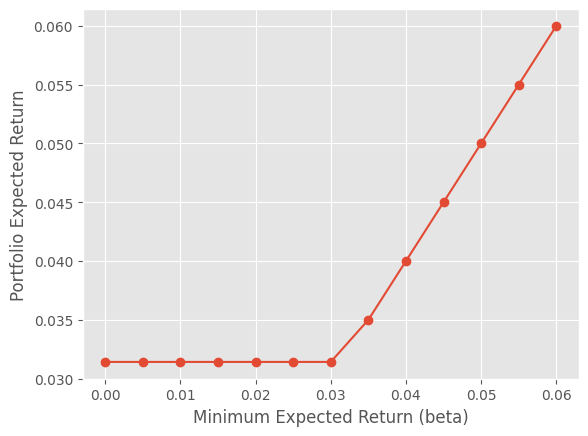

In [3]:
# Plot portfolio expected returns versus beta
plt.plot(beta_list, expected_return, "o-")
plt.xlabel("Minimum Expected Return (beta)")
plt.ylabel("Portfolio Expected Return")
plt.show()

In [4]:
# Find which active beta
for i, w in enumerate(w_list):
    if mu @ w == beta_list[i]:
        active_beta = beta_list[i]
print("The inequality constraint is active for beta =", active_beta)

The inequality constraint is active for beta = 0.045


Recall that the expected stock return $\boldsymbol{\mu} = [0.02, 0.003, 0.07]^\top$. 0.07 is the maximum expected stock return. Whereas, if the minimum expected return $\beta \geq 0.07$, the constraint $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$ means $[0.02, 0.003, 0.07]^\top\mathbf{w} \geq 0.07$, and no portfolio can satisfy the constraint since $\mathbf{w}^\top\mathbf{1} = 1$.

### (d)

Evaluating a set of portfolios with different $\beta$ is necessary to choose the optimal hyperparameter (also called hyperparameter tuning). There are two main methods to conduct this repetitive evaluation. Method 1: Reconstruct the entire problem and plug in a new $\beta$ repeatedly, i.e., each problem is independent. Method 2: Use the CVXPY parameters function and only define the problem once.

Please finish the following tasks:

Write code of both methods for (b) (you might have already implemented one). Print the $\mathbf{w}_{\beta}^\star$ with $\beta=0.01$ of both methods and ensure that they are the same.

Compare their speeds: How many times faster is the second method than the first method in this example?

In [5]:
## Method 1 (implemented in (b))
start = time.time()

# Reconstruct problem repeatedly
for beta in beta_list:
    w = cp.Variable(len(mu))
    objective = cp.Minimize(cp.quad_form(w, Sigma))
    constraints = [mu @ w >= beta, w >= 0, cp.sum(w) == 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    if beta == 0.01:
        print("Optimal portfolio for beta = 0.01 is", w.value)

method_1_time = time.time() - start


## Method 2
start = time.time()

# Define the problem once
w = cp.Variable(len(mu))
# Use parameter function
gamma = cp.Parameter(nonneg=True)
objective = cp.Minimize(cp.quad_form(w, Sigma))
constraints = [mu @ w >= gamma, w >= 0, cp.sum(w) == 1]
problem = cp.Problem(objective, constraints)

for beta in beta_list:
    gamma.value = beta
    problem.solve()
    if beta == 0.01:
        print("Optimal portfolio for beta = 0.01 is", w.value)

method_2_time = time.time() - start


print("Method 1 time:", method_1_time, "seconds")
print("Method 2 time:", method_2_time, "seconds")
print("Method 2 is", method_1_time / method_2_time, "times fasters than Method 1")

Optimal portfolio for beta = 0.01 is [0.29585799 0.35502959 0.34911243]
Optimal portfolio for beta = 0.01 is [0.29585799 0.35502959 0.34911243]
Method 1 time: 0.07279014587402344 seconds
Method 2 time: 0.024541616439819336 seconds
Method 2 is 2.9659882450089863 times fasters than Method 1


### (e)

Assume the constraint $\boldsymbol{\mu}^\top\mathbf{w} \geq \beta$ changes to $\boldsymbol{\mu}^\top\mathbf{w} = \beta$. Then the allocation process is formulated as the following optimization problem: $$  \begin{array}{ll} \underset{\mathbf{w}}{\mathsf{minimize}} & \mathbf{w}^\top\boldsymbol{\Sigma}\mathbf{w}\\ \mathsf{subject~to} & \boldsymbol{\mu}^\top\mathbf{w} = \beta \\ & \mathbf{w} \geq \mathbf{0} \\ & \mathbf{w}^\top\mathbf{1} = 1, \end{array}  $$

Please solve the above problem given the following values of 
$$\beta = \{0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05, 0.055, 0.06\}$$
 ($\boldsymbol{\Sigma}$ and $\boldsymbol{\mu}$ remain the same as in (b)).

Then finish the following tasks:

Create a curve plot $\mathsf{Portfolio Expected Return}$ versus $\mathsf{Portfolio Volatility}$.

Explain how and why it is different from the curve in (b).

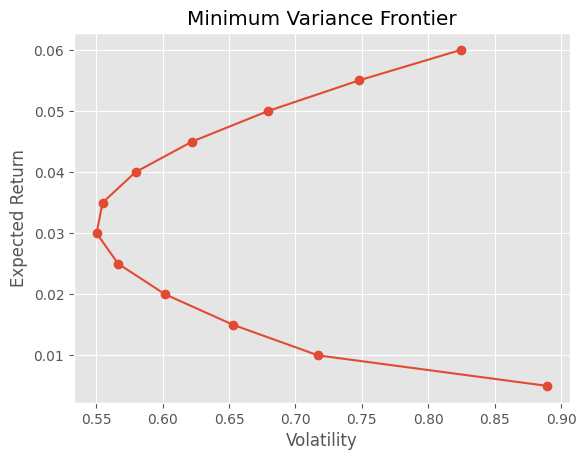

In [6]:
# Define data
w_list = []

# Solve for portolios
for beta in beta_list[1:]:
    w = cp.Variable(len(mu))
    objective = cp.Minimize(cp.quad_form(w, Sigma))
    constraints = [mu @ w == beta, w >= 0, cp.sum(w) == 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    w_list.append(w.value)

# Calculate portolio expected return vesus portfolio volatility
new_expected_return = [w @ mu for w in w_list]
new_volatility = [np.sqrt(w @ Sigma @ w) for w in w_list]

# Plot portolio expected return vesus portfolio volatility
plt.plot(new_volatility, new_expected_return, "o-")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Minimum Variance Frontier")
plt.show()

The frontier in (e) contains inefficient points. There are points with higher risk and lower return.
Since $\boldsymbol{\mu}^{\top} \mathbf{w}$ does not have to be equal to $\beta$ while minimizing the variance in (b), higher return can be got with the same level of risk.